## Описание

Анализ и сравненение методов работы с задачами, в которых присутствует дисбаланс классов.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from tqdm.auto import tqdm

В качестве данных для нашей работы возьмем выложенный на kaggle датасет транзакций, в котором нужно выискивать мошеннические проводки: [клик](https://www.kaggle.com/mlg-ulb/creditcardfraud). Данная задача по определению подходит под несбалансированную, что можно сказать даже без наличия каких-либо данных (понятно, что среди всех транзакций клиентов очень малая часть будет мошеннической).

Загрузим данные, проведем некоторые классические манипуляции.

In [16]:
df = pd.read_csv('/content/sample_data/creditcard.csv')

In [17]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801   
1      -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235   
2       1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084   
3       1.247203  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228   
4       0.095921  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196   
...          ...       ...       ...       ...       ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  4.356170 -1.593105  2.711941   
284803  1.058415  0.024330  0.294869  0.584800 -0.975926 -0.150189  0.915802   
284804  3.031260 -0.296827  0.708417  0.432454 -0.484782  0.411614  0.063119   
284805  0.623708 -0.686180  0.679145  0.392087 -0.399126 -1.933849 -0.962886   
284806 -0.649617  1.577006 -0.414650  0.486180 -0.915427 -1.040458 -0.031513   

             V13       V14       V15       V16       V17       V18       V19  \
0      -0.991390 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993   
1       0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783   
2       0.717293 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857   
3       0.507757 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622   
4       1.345852 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487   
...          ...       ...       ...       ...       ...       ...       ...   
284802 -0.689256  4.626942 -0.924459  1.107641  1.991691  0.510632 -0.682920   
284803  1.214756 -0.675143  1.164931 -0.711757 -0.025693 -1.221179 -1.545556   
284804 -0.183699 -0.510602  1.329284  0.140716  0.313502  0.395652 -0.577252   
284805 -1.042082  0.449624  1.962563 -0.608577  0.509928  1.113981  2.897849   
284806 -0.188093 -0.084316  0.041333 -0.302620 -0.660377  0.167430 -0.256117   

             V20       V21       V22       V23       V24       V25       V26  \
0       0.251412 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1      -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895   
2       0.524980  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3      -0.208038 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4       0.408542 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.475829  0.213454  0.111864  1.014480 -0.509348  1.436807  0.250034   
284803  0.059616  0.214205  0.924384  0.012463 -1.016226 -0.606624 -0.395255   
284804  0.001396  0.232045  0.578229 -0.037501  0.640134  0.265745 -0.087371   
284805  0.127434  0.265245  0.800049 -0.163298  0.123205 -0.569159  0.546668   
284806  0.382948  0.261057  0.643078  0.376777  0.008797 -0.473649 -0.818267   

             V27       V28  Amount  Class  
0       0.133558 -0.021053  149.62      0  
1      -0.008983  0.014724    2.69      0  
2      -0.055353 -0.059752  378.66      0  
3       0.062723  0.061458  123.50      0  
4       0.219422  0.215153   69.99      0  


Данные были анонимизированы. Мы имеем 30 признаков, из которых 28 - это результаты PCA-преобразования на исходном датасете. Еще 2 признака представляют собой время в секундах, прошедшее с момента первой транзакции в датасете, и размер транзакции. Посмотрим, какая доля положительных объектов в выборке?

In [18]:
a = df[df['Class'] == 0].shape[0] / df.shape[0]
print('Доля легальных транзакций: ', a)
print('Доля мошеннических транзакций: ', 1 - a)

Доля легальных транзакций:  0.9982725143693799
Доля мошеннических транзакций:  0.0017274856306200848


Начнем с обработки времени. Секунды сами по себе не несут большой информации о зависимостях в данных, создадим признаки "час" (от 0 до 23) и "день" (от 0 до ...) в аналогичной манере (принимая первый объект выборки за начальную точку).

In [19]:
df['hour'] =  (df['Time'] / 3600) % 24 // 1
df['day'] = (df['Time'] / 3600) / 24 // 1
print('Количество дней, за которые собраны данные: ', df.day.unique().shape[0])

Количество дней, за которые собраны данные:  2


Text(0.5, 0, 'Час')

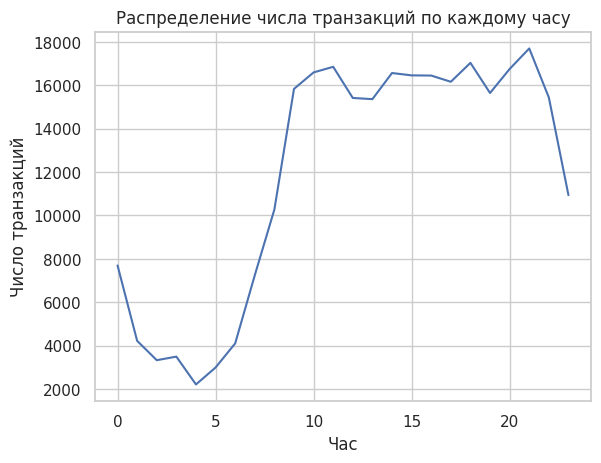

In [20]:
a = df.groupby(by='hour').count().reset_index()
ax = sns.lineplot(x=a['hour'], y=a['day'])
ax.set_title('Распределение числа транзакций по каждому часу')
ax.set_ylabel('Число транзакций')
ax.set_xlabel('Час')

Text(0.5, 0, 'Час')

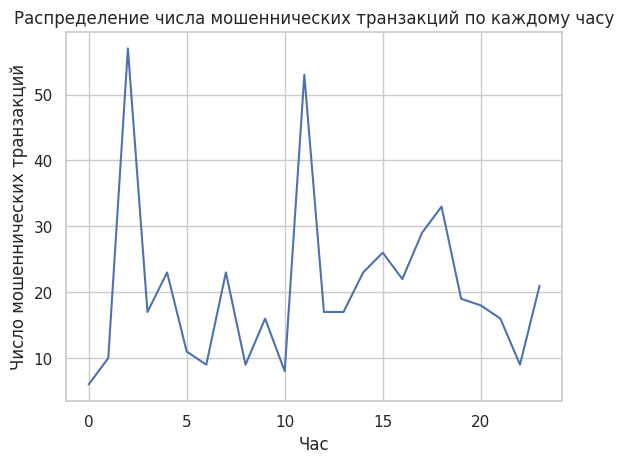

In [21]:
a = df[df['Class'] == 1].groupby(by='hour').count().reset_index()
ax = sns.lineplot(x=a['hour'], y=a['day'])
ax.set_title('Распределение числа мошеннических транзакций по каждому часу')
ax.set_ylabel('Число мошеннических транзакций')
ax.set_xlabel('Час')

Text(0.5, 0, 'День')

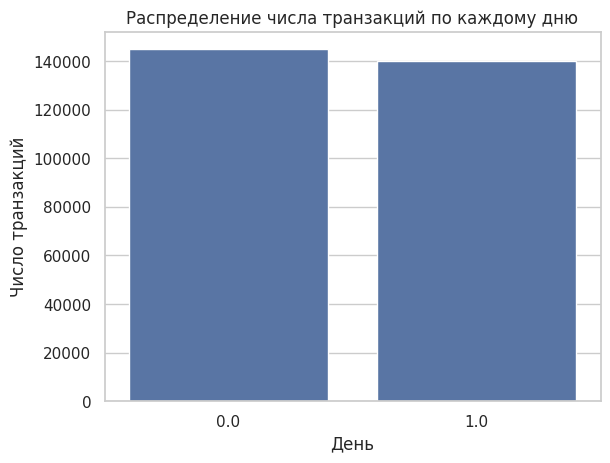

In [22]:
a = df.groupby(by='day').count().reset_index()
ax = sns.barplot(x=a['day'], y=a['hour'])
ax.set_title('Распределение числа транзакций по каждому дню')
ax.set_ylabel('Число транзакций')
ax.set_xlabel('День')

Text(0.5, 0, 'День')

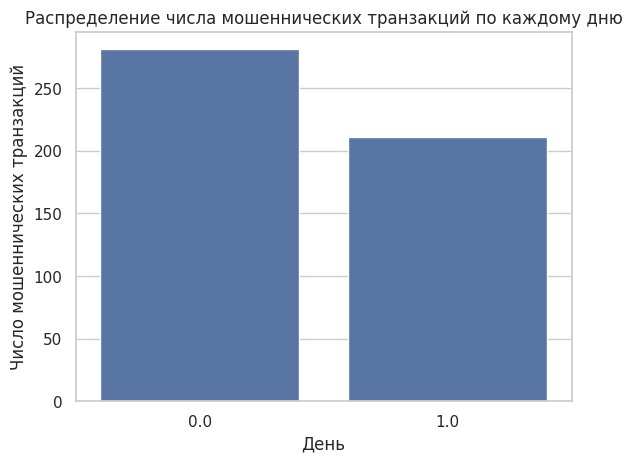

In [23]:
a = df[df['Class'] == 1].groupby(by='day').count().reset_index()
ax = sns.barplot(x=a['day'], y=a['hour'])
ax.set_title('Распределение числа мошеннических транзакций по каждому дню')
ax.set_ylabel('Число мошеннических транзакций')
ax.set_xlabel('День')

Распределение транзакций по дням не даёт существенной информации. А вот глядя на распределение по часам, можно увидеть, что пики приходятся на 2 часа ночи и 11 часов утра.

С помощью корелляции с итоговым классом отберём признаки, так как в анонимизированном состоянии про них тяжело что-то сказать.

In [24]:
cor = abs(df.iloc[:, 1:29].corrwith(df['Class'])).sort_values(ascending=False)
cor

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
V7     0.187257
V11    0.154876
V4     0.133447
V18    0.111485
V1     0.101347
V9     0.097733
V5     0.094974
V2     0.091289
V6     0.043643
V21    0.040413
V19    0.034783
V20    0.020090
V8     0.019875
V27    0.017580
V28    0.009536
V24    0.007221
V13    0.004570
V26    0.004455
V15    0.004223
V25    0.003308
V23    0.002685
V22    0.000805
dtype: float64

<ipython-input-26-6cf15237e301>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df[cor[: 1].index])


Text(0, 0.5, 'V17')

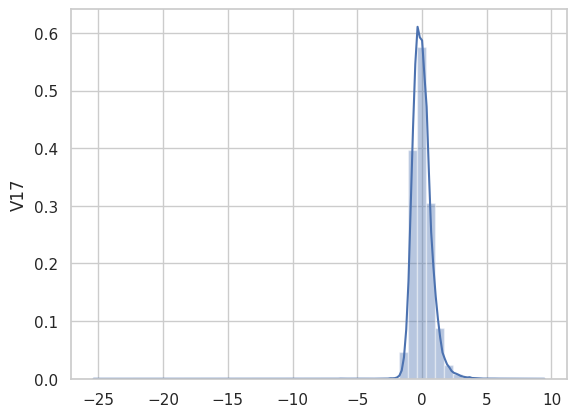

In [26]:
ax1 = sns.distplot(df[cor[: 1].index])
ax1.set_ylabel(cor[: 1].index[0])

<ipython-input-27-5a38031039e1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(df[cor[1: 2].index])


Text(0, 0.5, 'V14')

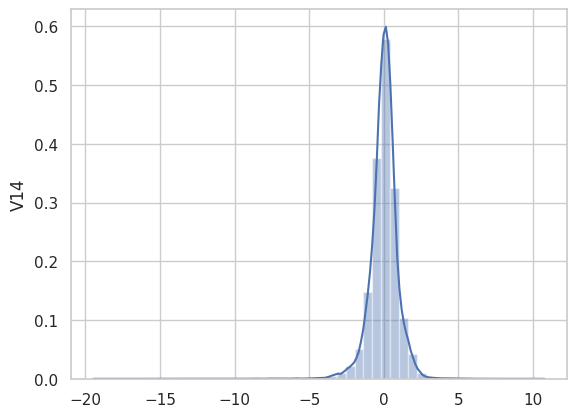

In [27]:
ax2 = sns.distplot(df[cor[1: 2].index])
ax2.set_ylabel(cor[1: 2].index[0])

<ipython-input-28-15d6cad8fca6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax3 = sns.distplot(df[cor[2: 3].index])


Text(0, 0.5, 'V12')

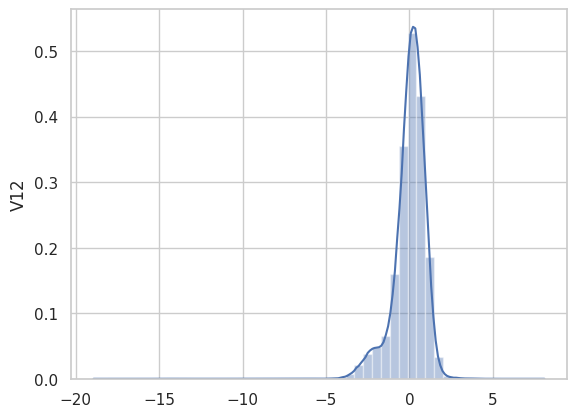

In [28]:
ax3 = sns.distplot(df[cor[2: 3].index])
ax3.set_ylabel(cor[2: 3].index[0])

Разделим данные на тренировочную, тестовую и валидационную выборку. Отделим хронологически последние 20% транзакций и поделите их пополам на валидационные и тестовые. Это разбиение не совсем корректно (как можно было заметить, мошеннические транзакции имеют разное распределение во времени - по-хорошему, нам стоило бы выделить целые сутки записей как под валидацию, так и под тест), тем не менее, мы не сможем получить больше данных для адекватного контроля, поэтому обойдемся этим.

In [29]:
from sklearn.model_selection import train_test_split

train, pre_test = train_test_split(df, test_size=0.2, shuffle=False)
val, test = train_test_split(pre_test, test_size=0.5, shuffle=False)

В качестве метрик качества возьмём AUC-PR, кожффициент Каппа Коэна и коэффициент корреляции Мэтьюза


In [30]:
 from sklearn.metrics import average_precision_score, accuracy_score

Коэффициент Каппа Коэна, представляющий собой нормализованную `accuracy`:

$$\kappa = \frac{p_o - p_e}{1 - p_e}$$

Данная метрика служит в качестве меры согласованности между двумя независимыми предсказателями, но ничего не знает про "верные" и "предсказанные" метки (в отличие от многих других метрик машинного обучения). Здесь $p_o$ - доля согласованных предсказаний, а $p_e$ - доля согласованных предсказаний, которая могла бы получиться при случайных ответах предсказателей. В нашем случае это работает так:

• В качестве $p_o$ берем accuracy

• В качестве $p_e$ примем следующую величину - вероятность случайного соглашения позитивных ответов (произведение долей позитивных ответов в обоих предсказаниях) плюс вероятность случайного соглашения негативных ответов (произведение долей негативных ответов в обоих предсказаниях)

Метрика принимает значения от -1 до 1, где 1 - полная согласованность, 0 - согласованность на уровне рандома, -1 - совсем плохо:

In [31]:
def Kappa(ans, pred):
    a = pred.shape[0]
    p0 = np.sum(pred == ans) / a
    pe = (1 - np.count_nonzero(pred) / a) * (1 - np.count_nonzero(ans) / a) + np.count_nonzero(pred) * np.count_nonzero(ans) / a ** 2
    return (p0 - pe) / (1 - pe)

Еще одной метрикой в такой задаче служит коэффициент корреляции Мэтьюза, выражающийся в терминах матрицы ошибок следующим образом:

$$\text{MCC} = \frac{TP\times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$

Метрика принимает значения от -1 до 1, интерпретируемые аналогичным образом.

In [32]:
def MCC(ans, pred):
    a = pred.shape[0]
    TP = np.sum(pred[ans == pred] == 1) / a
    TN = np.sum(pred[ans == pred] == 0) / a
    FN = np.sum(pred[ans != pred] == 0) / a
    FP = np.sum(pred[ans != pred] == 1) / a
    if TP * TN - FP * FN ==  0:
        return 0
    return (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

Эти метрики вычисляются на бинаризованных предсказаниях, поэтому может иметь смысл дополнительная настройка порога бинаризации (но не уверен, что буду это проделывать).

Давайте проверим, что наши метрики действительно подходят под задачу. Вычислим их значения для наивного предсказания (aka мажорный класс для всех объектов):

In [33]:
test_pred = np.array([np.argmax(np.bincount(train['Class']))] * test.shape[0])
print('AUC-PR для теста: ', average_precision_score(test['Class'], test_pred))

AUC-PR для теста:  0.000772444787753239


In [34]:
print('Kappa для теста: ', Kappa(test['Class'], test_pred))

Kappa для теста:  0.0


In [35]:
print('MCC для теста: ', MCC(test['Class'], test_pred))

MCC для теста:  0


Запустим бейзлайн-решение для нашей задачи.Возьмём `catboost` и обучим его классификатор на наших данных (используйте все признаки). Вычислим значения всех метрик на тестовой части, для контроля переобучения будем использовать валидационную выборку.

In [37]:
from catboost import CatBoostClassifier, Pool

In [38]:
cat = ['hour', 'day']
em = list(train.drop(columns=['Class', 'hour', 'day']).columns)

In [39]:
model = CatBoostClassifier()
model.fit(X=train.drop(columns=['Class']), y=train['Class'], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))

Learning rate set to 0.121128
0:	learn: 0.3333722	test: 0.3290991	best: 0.3290991 (0)	total: 142ms	remaining: 2m 22s
1:	learn: 0.1567044	test: 0.1541541	best: 0.1541541 (1)	total: 216ms	remaining: 1m 47s
2:	learn: 0.0755565	test: 0.0744113	best: 0.0744113 (2)	total: 280ms	remaining: 1m 32s
3:	learn: 0.0401066	test: 0.0401726	best: 0.0401726 (3)	total: 356ms	remaining: 1m 28s
4:	learn: 0.0230191	test: 0.0231112	best: 0.0231112 (4)	total: 415ms	remaining: 1m 22s
5:	learn: 0.0144869	test: 0.0147166	best: 0.0147166 (5)	total: 482ms	remaining: 1m 19s
6:	learn: 0.0098470	test: 0.0101487	best: 0.0101487 (6)	total: 539ms	remaining: 1m 16s
7:	learn: 0.0072733	test: 0.0076743	best: 0.0076743 (7)	total: 600ms	remaining: 1m 14s
8:	learn: 0.0056206	test: 0.0060296	best: 0.0060296 (8)	total: 658ms	remaining: 1m 12s
9:	learn: 0.0045758	test: 0.0049623	best: 0.0049623 (9)	total: 739ms	remaining: 1m 13s
10:	learn: 0.0039811	test: 0.0044389	best: 0.0044389 (10)	total: 838ms	remaining: 1m 15s
11:	learn: 

In [40]:
print('AUC-PR для бустинга на тесте: ', average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для бустинга на тесте: ', Kappa(test['Class'], boost_pred))
print('MCC для бустинга на тесте: ', MCC(test['Class'], boost_pred))

AUC-PR для бустинга на тесте:  0.6566908264783209
Kappa для бустинга на тесте:  0.717758652842163
MCC для бустинга на тесте:  0.723739272283833


Многие реализации методов предлагают встроенные способы для борьбы с проблемой дисбаланаса классов. Самое часто встречающееся решение - просто добавить вес в функции потерь для минорного класса (таким образом, ошибка на объекте минорного класса будет весить больше, чем для мажорного). Возьмём в качестве веса отношение числа объектов мажорного класса к числу минорного.

In [41]:
model = CatBoostClassifier(scale_pos_weight=train.shape[0] / train[train.Class > 0].shape[0] - 1, verbose=False)
model.fit(X=train.drop(columns=['Class']), y=train['Class'], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))
print('AUC-PR для бустинга на тесте: ', average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для бустинга на тесте: ', Kappa(test['Class'], boost_pred))
print('MCC для бустинга на тесте: ', MCC(test['Class'], boost_pred))

AUC-PR для бустинга на тесте:  0.6759568383686374
Kappa для бустинга на тесте:  0.1304655268385575
MCC для бустинга на тесте:  0.22798868173416462


Поскольку данный вес будет являться гиперпараметром метода, было бы опрометчиво остановиться на одном значении. Запустим перебор для этого гиперпараметра на валидационной выборке, подберём оптимальный порог бинаризации для $\kappa$ или $\text{MCC}$.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
spw = np.logspace(2, 3, num=40)
grid = GridSearchCV(CatBoostClassifier(iterations=300), [{'scale_pos_weight': spw}], scoring='average_precision', cv=4)
grid.fit(val.drop(columns=['Class']), val['Class'])

Выходные данные были обрезаны до нескольких последних строк (5000).
116:	learn: 0.0005994	total: 1.59s	remaining: 2.49s
117:	learn: 0.0005994	total: 1.6s	remaining: 2.47s
118:	learn: 0.0005994	total: 1.61s	remaining: 2.45s
119:	learn: 0.0005994	total: 1.62s	remaining: 2.44s
120:	learn: 0.0005994	total: 1.64s	remaining: 2.42s
121:	learn: 0.0005994	total: 1.65s	remaining: 2.4s
122:	learn: 0.0005994	total: 1.66s	remaining: 2.39s
123:	learn: 0.0005994	total: 1.67s	remaining: 2.37s
124:	learn: 0.0005994	total: 1.69s	remaining: 2.37s
125:	learn: 0.0005994	total: 1.7s	remaining: 2.35s
126:	learn: 0.0005994	total: 1.71s	remaining: 2.33s
127:	learn: 0.0005994	total: 1.72s	remaining: 2.31s
128:	learn: 0.0005994	total: 1.73s	remaining: 2.3s
129:	learn: 0.0005994	total: 1.74s	remaining: 2.28s
130:	learn: 0.0005994	total: 1.76s	remaining: 2.27s
131:	learn: 0.0005994	total: 1.78s	remaining: 2.26s
132:	learn: 0.0005994	total: 1.79s	remaining: 2.25s
133:	learn: 0.0005994	total: 1.8s	remaining: 2.23s
1

GridSearchCV(cv=4,
             estimator=<catboost.core.CatBoostClassifier object at 0x7c4983088730>,
             param_grid=[{'scale_pos_weight': array([ 100.        ,  106.08183551,  112.53355826,  119.37766417,
        126.63801735,  134.33993326,  142.51026703,  151.17750706,
        160.37187438,  170.12542799,  180.47217668,  191.44819762,
        203.09176209,  215.443469  ,  228.54638641,  242.44620171,
        257.19138091,  272.83333765,  289.42661247,  307.02906298,
        325.70206557,  345.51072946,  366.52412371,  388.81551803,
        412.46263829,  437.54793751,  464.15888336,  492.38826317,
        522.33450743,  554.102033  ,  587.80160723,  623.55073413,
        661.47406412,  701.70382867,  744.38030133,  789.65228685,
        837.67764007,  888.62381627,  942.66845512, 1000.        ])}],
             scoring='average_precision')

In [44]:
best = grid.best_params_['scale_pos_weight']
model = CatBoostClassifier(scale_pos_weight=best)
model.fit(X=train.drop(columns=['Class']), y=train['Class'], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
prob = model.predict_proba(val.drop(columns=['Class']))[:, 1]
prob

Learning rate set to 0.121128
0:	learn: 0.4884806	test: 0.4950404	best: 0.4950404 (0)	total: 65.5ms	remaining: 1m 5s
1:	learn: 0.3554484	test: 0.3722949	best: 0.3722949 (1)	total: 131ms	remaining: 1m 5s
2:	learn: 0.2748767	test: 0.2913721	best: 0.2913721 (2)	total: 212ms	remaining: 1m 10s
3:	learn: 0.2002465	test: 0.2165718	best: 0.2165718 (3)	total: 275ms	remaining: 1m 8s
4:	learn: 0.1659581	test: 0.1849486	best: 0.1849486 (4)	total: 346ms	remaining: 1m 8s
5:	learn: 0.1272923	test: 0.1410469	best: 0.1410469 (5)	total: 438ms	remaining: 1m 12s
6:	learn: 0.1080046	test: 0.1238051	best: 0.1238051 (6)	total: 510ms	remaining: 1m 12s
7:	learn: 0.0977383	test: 0.1184776	best: 0.1184776 (7)	total: 577ms	remaining: 1m 11s
8:	learn: 0.0893832	test: 0.1096662	best: 0.1096662 (8)	total: 636ms	remaining: 1m 10s
9:	learn: 0.0785002	test: 0.1027378	best: 0.1027378 (9)	total: 705ms	remaining: 1m 9s
10:	learn: 0.0744391	test: 0.1009673	best: 0.1009673 (10)	total: 766ms	remaining: 1m 8s
11:	learn: 0.069

array([0.00186396, 0.00312823, 0.00325668, ..., 0.02543699, 0.00090867,
       0.00090657])

In [45]:
k_best = -1
mcc_best = -1
for i in np.linspace(0, 1, num=40):
    new_k = Kappa(val['Class'], prob > i)
    new_mcc = MCC(val['Class'], prob > i)
    if new_k > k_best:
        ans_k = i
        k_best = new_k
    if new_mcc > mcc_best:
        ans_mcc = i
        mcc_best = new_mcc

In [46]:
ans_k, ans_mcc

(0.8974358974358974, 0.8974358974358974)

In [47]:
test_prob = model.predict_proba(test.drop(columns=['Class']))[:, 1]
print('AUC-PR для бустинга на тесте: ', average_precision_score(test['Class'], test_prob))
print('Kappa для бустинга на тесте: ', Kappa(test['Class'], test_prob > ans_k))
print('MCC для бустинга на тесте: ', MCC(test['Class'], test_prob > ans_mcc))

AUC-PR для бустинга на тесте:  0.6194166822087444
Kappa для бустинга на тесте:  0.6497565106179631
MCC для бустинга на тесте:  0.6530344544396225


Следующий рассматриваемый метод - оверсэмплингом. Фактически, мы можем продублировать все объекты минорного класса и получить тот же эффект, какой был бы при использовании веса, равного 2. Тем не менее, такой подход - это лишь малая часть того, что мы можем проделать с целью повысить число объектов минорного класса.

Для продолжения работы установим библиотеку [imbalanced-learn](https://imbalanced-learn.org/stable/):

In [48]:
!pip install imbalanced-learn

Первый метод, которым мы воспользуемся, называется SMOTE. Кратко опишем суть: мы выбираем случайного кандидата среди $k$ ближайших соседей объекта минорного класса, затем берем точку на отрезке между двумя объектами (т.е. выпуклую комбинацию со случайными коэффициентами) и добавляем в выборку.

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
sm = SMOTE(random_state=1)
sm_tr = sm.fit_resample(train.drop(columns=['Class']), train['Class'])

In [51]:
model = CatBoostClassifier()
model.fit(X=sm_tr[0], y=sm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))
print('AUC-PR для бустинга на тесте SMOTE: ', average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для бустинга на тесте SMOTE: ', Kappa(test['Class'], boost_pred))
print('MCC для бустинга на тесте SMOTE: ', MCC(test['Class'], boost_pred))

Learning rate set to 0.143683
0:	learn: 0.3981315	test: 0.4659428	best: 0.4659428 (0)	total: 301ms	remaining: 5m
1:	learn: 0.2454405	test: 0.3001075	best: 0.3001075 (1)	total: 445ms	remaining: 3m 42s
2:	learn: 0.1779288	test: 0.2141683	best: 0.2141683 (2)	total: 572ms	remaining: 3m 10s
3:	learn: 0.1365355	test: 0.1650074	best: 0.1650074 (3)	total: 703ms	remaining: 2m 54s
4:	learn: 0.1133086	test: 0.1281129	best: 0.1281129 (4)	total: 835ms	remaining: 2m 46s
5:	learn: 0.0984249	test: 0.0919211	best: 0.0919211 (5)	total: 1.04s	remaining: 2m 52s
6:	learn: 0.0874665	test: 0.0791007	best: 0.0791007 (6)	total: 1.32s	remaining: 3m 7s
7:	learn: 0.0798456	test: 0.0711323	best: 0.0711323 (7)	total: 1.58s	remaining: 3m 15s
8:	learn: 0.0724263	test: 0.0601046	best: 0.0601046 (8)	total: 1.87s	remaining: 3m 26s
9:	learn: 0.0680620	test: 0.0541061	best: 0.0541061 (9)	total: 2.15s	remaining: 3m 33s
10:	learn: 0.0646537	test: 0.0513901	best: 0.0513901 (10)	total: 2.39s	remaining: 3m 35s
11:	learn: 0.061

In [52]:
sm = SMOTE(sampling_strategy=0.5, random_state=1)
sm_tr = sm.fit_resample(train.drop(columns=['Class']), train['Class'])
model = CatBoostClassifier()
model.fit(X=sm_tr[0], y=sm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))
print('AUC-PR для бустинга на тесте SMOTE 1:2 : ', average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для бустинга на тесте SMOTE 1:2: ', Kappa(test['Class'], boost_pred))
print('MCC для бустинга на тесте SMOTE 1:2: ', MCC(test['Class'], boost_pred))

Learning rate set to 0.133827
0:	learn: 0.4139384	test: 0.4369505	best: 0.4369505 (0)	total: 121ms	remaining: 2m
1:	learn: 0.2678380	test: 0.2808208	best: 0.2808208 (1)	total: 267ms	remaining: 2m 13s
2:	learn: 0.1924691	test: 0.2010901	best: 0.2010901 (2)	total: 407ms	remaining: 2m 15s
3:	learn: 0.1412290	test: 0.1399442	best: 0.1399442 (3)	total: 607ms	remaining: 2m 31s
4:	learn: 0.1150283	test: 0.0942564	best: 0.0942564 (4)	total: 715ms	remaining: 2m 22s
5:	learn: 0.1002420	test: 0.0799967	best: 0.0799967 (5)	total: 807ms	remaining: 2m 13s
6:	learn: 0.0884221	test: 0.0682632	best: 0.0682632 (6)	total: 895ms	remaining: 2m 7s
7:	learn: 0.0776203	test: 0.0533193	best: 0.0533193 (7)	total: 1s	remaining: 2m 4s
8:	learn: 0.0703774	test: 0.0480656	best: 0.0480656 (8)	total: 1.15s	remaining: 2m 6s
9:	learn: 0.0655501	test: 0.0438235	best: 0.0438235 (9)	total: 1.33s	remaining: 2m 11s
10:	learn: 0.0614723	test: 0.0398392	best: 0.0398392 (10)	total: 1.5s	remaining: 2m 15s
11:	learn: 0.0575041	t

In [53]:
sm = SMOTE(sampling_strategy=0.1, random_state=1)
sm_tr = sm.fit_resample(train.drop(columns=['Class']), train['Class'])
model = CatBoostClassifier()
model.fit(X=sm_tr[0], y=sm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))
print('AUC-PR для бустинга на тесте SMOTE 1:10 : ', average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для бустинга на тесте SMOTE 1:10: ', Kappa(test['Class'], boost_pred))
print('MCC для бустинга на тесте SMOTE 1:10: ', MCC(test['Class'], boost_pred))

Learning rate set to 0.123958
0:	learn: 0.4433770	test: 0.4443098	best: 0.4443098 (0)	total: 66ms	remaining: 1m 5s
1:	learn: 0.2628675	test: 0.2575841	best: 0.2575841 (1)	total: 135ms	remaining: 1m 7s
2:	learn: 0.1808613	test: 0.1720777	best: 0.1720777 (2)	total: 204ms	remaining: 1m 7s
3:	learn: 0.1279196	test: 0.1157884	best: 0.1157884 (3)	total: 270ms	remaining: 1m 7s
4:	learn: 0.0905787	test: 0.0758835	best: 0.0758835 (4)	total: 335ms	remaining: 1m 6s
5:	learn: 0.0690150	test: 0.0519234	best: 0.0519234 (5)	total: 404ms	remaining: 1m 6s
6:	learn: 0.0566637	test: 0.0382341	best: 0.0382341 (6)	total: 478ms	remaining: 1m 7s
7:	learn: 0.0470086	test: 0.0291866	best: 0.0291866 (7)	total: 549ms	remaining: 1m 8s
8:	learn: 0.0404858	test: 0.0220321	best: 0.0220321 (8)	total: 643ms	remaining: 1m 10s
9:	learn: 0.0367994	test: 0.0190395	best: 0.0190395 (9)	total: 723ms	remaining: 1m 11s
10:	learn: 0.0342304	test: 0.0161391	best: 0.0161391 (10)	total: 793ms	remaining: 1m 11s
11:	learn: 0.0319900

Для vanilla SMOTE существуют некоторые модификации, часть из которых была реализована в библиотеке imblearn.


BorderlineSMOTE - в этом методе после определения k ближайших соседей для объекта минорного класса считается количество объектов мажорантного класса среди них (число m). После этого остаются для генерации новых объектов только те объекты, для которых выполнено, k/2 < m < k. То есть те объекты, для которых принадлежность к классу сомнительна.

SVM-SMOTE - тут вместо KNN применется SVM.

K-Means-SMOTE - исходное пространство объектов разбивается а классы с помощью K-means. В классы, где минорный класс вмтречается редко добавляются новые объекты, после чего ко всем кластерам применяется SMOTE.

ADASYN - этот метод генерирует объекты на основе плотности распределения классов.

In [54]:
from imblearn.over_sampling import BorderlineSMOTE, SVMSMOTE, ADASYN, KMeansSMOTE

In [55]:
sm = BorderlineSMOTE(sampling_strategy=0.1, random_state=1)
sm_tr = sm.fit_resample(train.drop(columns=['Class']), train['Class'])
model = CatBoostClassifier()
model.fit(X=sm_tr[0], y=sm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))
print('AUC-PR для бустинга на тесте SMOTE 1:10 : ', average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для бустинга на тесте SMOTE 1:10: ', Kappa(test['Class'], boost_pred))
print('MCC для бустинга на тесте SMOTE 1:10: ', MCC(test['Class'], boost_pred))

Learning rate set to 0.123958
0:	learn: 0.3625307	test: 0.3592035	best: 0.3592035 (0)	total: 69.9ms	remaining: 1m 9s
1:	learn: 0.2005872	test: 0.2024257	best: 0.2024257 (1)	total: 141ms	remaining: 1m 10s
2:	learn: 0.1090711	test: 0.0991948	best: 0.0991948 (2)	total: 209ms	remaining: 1m 9s
3:	learn: 0.0657028	test: 0.0533787	best: 0.0533787 (3)	total: 273ms	remaining: 1m 7s
4:	learn: 0.0406068	test: 0.0312029	best: 0.0312029 (4)	total: 336ms	remaining: 1m 6s
5:	learn: 0.0267081	test: 0.0190701	best: 0.0190701 (5)	total: 416ms	remaining: 1m 8s
6:	learn: 0.0191270	test: 0.0122099	best: 0.0122099 (6)	total: 486ms	remaining: 1m 8s
7:	learn: 0.0150679	test: 0.0091549	best: 0.0091549 (7)	total: 551ms	remaining: 1m 8s
8:	learn: 0.0123607	test: 0.0072899	best: 0.0072899 (8)	total: 620ms	remaining: 1m 8s
9:	learn: 0.0103963	test: 0.0056774	best: 0.0056774 (9)	total: 682ms	remaining: 1m 7s
10:	learn: 0.0089650	test: 0.0048074	best: 0.0048074 (10)	total: 743ms	remaining: 1m 6s
11:	learn: 0.0082339

In [56]:
sm = BorderlineSMOTE(sampling_strategy=0.5, random_state=1)
sm_tr = sm.fit_resample(train.drop(columns=['Class']), train['Class'])
model = CatBoostClassifier()
model.fit(X=sm_tr[0], y=sm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))
print('AUC-PR для бустинга на тесте SMOTE 1:10 : ', average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для бустинга на тесте SMOTE 1:10: ', Kappa(test['Class'], boost_pred))
print('MCC для бустинга на тесте SMOTE 1:10: ', MCC(test['Class'], boost_pred))

Learning rate set to 0.133827
0:	learn: 0.3521549	test: 0.3677005	best: 0.3677005 (0)	total: 98.5ms	remaining: 1m 38s
1:	learn: 0.1783086	test: 0.1877133	best: 0.1877133 (1)	total: 196ms	remaining: 1m 37s
2:	learn: 0.0916173	test: 0.0871009	best: 0.0871009 (2)	total: 294ms	remaining: 1m 37s
3:	learn: 0.0549862	test: 0.0495499	best: 0.0495499 (3)	total: 393ms	remaining: 1m 37s
4:	learn: 0.0328418	test: 0.0258331	best: 0.0258331 (4)	total: 499ms	remaining: 1m 39s
5:	learn: 0.0229540	test: 0.0161003	best: 0.0161003 (5)	total: 591ms	remaining: 1m 37s
6:	learn: 0.0178686	test: 0.0130960	best: 0.0130960 (6)	total: 693ms	remaining: 1m 38s
7:	learn: 0.0148376	test: 0.0106357	best: 0.0106357 (7)	total: 786ms	remaining: 1m 37s
8:	learn: 0.0127194	test: 0.0088329	best: 0.0088329 (8)	total: 879ms	remaining: 1m 36s
9:	learn: 0.0111552	test: 0.0073083	best: 0.0073083 (9)	total: 976ms	remaining: 1m 36s
10:	learn: 0.0096836	test: 0.0065422	best: 0.0065422 (10)	total: 1.09s	remaining: 1m 38s
11:	learn:

In [57]:
sm = SVMSMOTE(sampling_strategy=0.1, random_state=1)
sm_tr = sm.fit_resample(train.drop(columns=['Class']), train['Class'])
model = CatBoostClassifier()
model.fit(X=sm_tr[0], y=sm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))
print('AUC-PR для бустинга на тесте SMOTE 1:10 : ', average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для бустинга на тесте SMOTE 1:10: ', Kappa(test['Class'], boost_pred))
print('MCC для бустинга на тесте SMOTE 1:10: ', MCC(test['Class'], boost_pred))

Learning rate set to 0.123958
0:	learn: 0.3571605	test: 0.3611734	best: 0.3611734 (0)	total: 66.1ms	remaining: 1m 6s
1:	learn: 0.1812023	test: 0.1861771	best: 0.1861771 (1)	total: 158ms	remaining: 1m 18s
2:	learn: 0.0922023	test: 0.0922103	best: 0.0922103 (2)	total: 229ms	remaining: 1m 16s
3:	learn: 0.0526101	test: 0.0501479	best: 0.0501479 (3)	total: 297ms	remaining: 1m 14s
4:	learn: 0.0338194	test: 0.0305995	best: 0.0305995 (4)	total: 366ms	remaining: 1m 12s
5:	learn: 0.0219594	test: 0.0185362	best: 0.0185362 (5)	total: 435ms	remaining: 1m 12s
6:	learn: 0.0169388	test: 0.0123541	best: 0.0123541 (6)	total: 496ms	remaining: 1m 10s
7:	learn: 0.0125367	test: 0.0085611	best: 0.0085611 (7)	total: 570ms	remaining: 1m 10s
8:	learn: 0.0101558	test: 0.0066169	best: 0.0066169 (8)	total: 638ms	remaining: 1m 10s
9:	learn: 0.0087487	test: 0.0054982	best: 0.0054982 (9)	total: 706ms	remaining: 1m 9s
10:	learn: 0.0079234	test: 0.0047834	best: 0.0047834 (10)	total: 771ms	remaining: 1m 9s
11:	learn: 0.

In [58]:
sm = SVMSMOTE(sampling_strategy=0.05, random_state=1)
sm_tr = sm.fit_resample(train.drop(columns=['Class']), train['Class'])
model = CatBoostClassifier()
model.fit(X=sm_tr[0], y=sm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))
print('AUC-PR для бустинга на тесте SMOTE 1:10 : ', average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для бустинга на тесте SMOTE 1:10: ', Kappa(test['Class'], boost_pred))
print('MCC для бустинга на тесте SMOTE 1:10: ', MCC(test['Class'], boost_pred))

Learning rate set to 0.122541
0:	learn: 0.3419276	test: 0.3333111	best: 0.3333111 (0)	total: 66.7ms	remaining: 1m 6s
1:	learn: 0.1728239	test: 0.1729673	best: 0.1729673 (1)	total: 136ms	remaining: 1m 7s
2:	learn: 0.0917158	test: 0.0843458	best: 0.0843458 (2)	total: 206ms	remaining: 1m 8s
3:	learn: 0.0520097	test: 0.0462762	best: 0.0462762 (3)	total: 272ms	remaining: 1m 7s
4:	learn: 0.0328613	test: 0.0282097	best: 0.0282097 (4)	total: 334ms	remaining: 1m 6s
5:	learn: 0.0220245	test: 0.0180930	best: 0.0180930 (5)	total: 418ms	remaining: 1m 9s
6:	learn: 0.0150824	test: 0.0113674	best: 0.0113674 (6)	total: 485ms	remaining: 1m 8s
7:	learn: 0.0119941	test: 0.0086868	best: 0.0086868 (7)	total: 546ms	remaining: 1m 7s
8:	learn: 0.0095669	test: 0.0064451	best: 0.0064451 (8)	total: 608ms	remaining: 1m 6s
9:	learn: 0.0082376	test: 0.0052702	best: 0.0052702 (9)	total: 676ms	remaining: 1m 6s
10:	learn: 0.0074393	test: 0.0047394	best: 0.0047394 (10)	total: 737ms	remaining: 1m 6s
11:	learn: 0.0067011	

In [59]:
sm = KMeansSMOTE(sampling_strategy=0.1, random_state=1, cluster_balance_threshold=0.0001)
sm_tr = sm.fit_resample(train.drop(columns=['Class']), train['Class'])
model = CatBoostClassifier()
model.fit(X=sm_tr[0], y=sm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))
print('AUC-PR для бустинга на тесте SMOTE 1:10 : ', average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для бустинга на тесте SMOTE 1:10: ', Kappa(test['Class'], boost_pred))
print('MCC для бустинга на тесте SMOTE 1:10: ', MCC(test['Class'], boost_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Learning rate set to 0.123958
0:	learn: 0.3879833	test: 0.3865607	best: 0.3865607 (0)	total: 70.7ms	remaining: 1m 10s
1:	learn: 0.1925946	test: 0.1706913	best: 0.1706913 (1)	total: 145ms	remaining: 1m 12s
2:	learn: 0.1092356	test: 0.0801489	best: 0.0801489 (2)	total: 222ms	remaining: 1m 13s
3:	learn: 0.0571291	test: 0.0394814	best: 0.0394814 (3)	total: 301ms	remaining: 1m 14s
4:	learn: 0.0338564	test: 0.0213513	best: 0.0213513 (4)	total: 376ms	remaining: 1m 14s
5:	learn: 0.0229542	test: 0.0129481	best: 0.0129481 (5)	total: 451ms	remaining: 1m 14s
6:	learn: 0.0175536	test: 0.0088207	best: 0.0088207 (6)	total: 527ms	remaining: 1m 14s
7:	learn: 0.0145272	test: 0.0068610	best: 0.0068610 (7)	total: 596ms	remaining: 1m 13s
8:	learn: 0.0121872	test: 0.0054319	best: 0.0054319 (8)	total: 671ms	remaining: 1m 13s
9:	learn: 0.0101755	test: 0.0045898	best: 0.0045898 (9)	total: 754ms	remaining: 1m 14s
10:	learn: 0.0090036	test: 0.0040951	best: 0.0040951 (10)	total: 837ms	remaining: 1m 15s
11:	learn:

In [60]:
sm = KMeansSMOTE(sampling_strategy=0.5, random_state=1, cluster_balance_threshold=0.0005)
sm_tr = sm.fit_resample(train.drop(columns=['Class']), train['Class'])
model = CatBoostClassifier()
model.fit(X=sm_tr[0], y=sm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))
print('AUC-PR для бустинга на тесте SMOTE 1:10 : ', average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для бустинга на тесте SMOTE 1:10: ', Kappa(test['Class'], boost_pred))
print('MCC для бустинга на тесте SMOTE 1:10: ', MCC(test['Class'], boost_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Learning rate set to 0.133828
0:	learn: 0.3288255	test: 0.3014496	best: 0.3014496 (0)	total: 93.5ms	remaining: 1m 33s
1:	learn: 0.1525986	test: 0.1254343	best: 0.1254343 (1)	total: 200ms	remaining: 1m 39s
2:	learn: 0.0702637	test: 0.0558373	best: 0.0558373 (2)	total: 304ms	remaining: 1m 41s
3:	learn: 0.0406480	test: 0.0302130	best: 0.0302130 (3)	total: 417ms	remaining: 1m 43s
4:	learn: 0.0241877	test: 0.0173339	best: 0.0173339 (4)	total: 521ms	remaining: 1m 43s
5:	learn: 0.0183445	test: 0.0132881	best: 0.0132881 (5)	total: 617ms	remaining: 1m 42s
6:	learn: 0.0140757	test: 0.0097782	best: 0.0097782 (6)	total: 732ms	remaining: 1m 43s
7:	learn: 0.0103286	test: 0.0067862	best: 0.0067862 (7)	total: 835ms	remaining: 1m 43s
8:	learn: 0.0086046	test: 0.0057127	best: 0.0057127 (8)	total: 941ms	remaining: 1m 43s
9:	learn: 0.0075659	test: 0.0052393	best: 0.0052393 (9)	total: 1.04s	remaining: 1m 42s
10:	learn: 0.0068505	test: 0.0050153	best: 0.0050153 (10)	total: 1.14s	remaining: 1m 42s
11:	learn:

In [61]:
sm = ADASYN(sampling_strategy=0.1, random_state=1)
sm_tr = sm.fit_resample(train.drop(columns=['Class']), train['Class'])
model = CatBoostClassifier()
model.fit(X=sm_tr[0], y=sm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))
print(boost_pred)
print('AUC-PR для бустинга на тесте SMOTE 1:10 : ', average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для бустинга на тесте SMOTE 1:10: ', Kappa(test['Class'], boost_pred))
print('MCC для бустинга на тесте SMOTE 1:10: ', MCC(test['Class'], boost_pred))

Learning rate set to 0.12397
0:	learn: 0.4438748	test: 0.4464904	best: 0.4464904 (0)	total: 64.2ms	remaining: 1m 4s
1:	learn: 0.2861913	test: 0.2853252	best: 0.2853252 (1)	total: 139ms	remaining: 1m 9s
2:	learn: 0.1971412	test: 0.1902485	best: 0.1902485 (2)	total: 211ms	remaining: 1m 10s
3:	learn: 0.1296220	test: 0.1180485	best: 0.1180485 (3)	total: 325ms	remaining: 1m 20s
4:	learn: 0.0939967	test: 0.0797711	best: 0.0797711 (4)	total: 424ms	remaining: 1m 24s
5:	learn: 0.0731923	test: 0.0577722	best: 0.0577722 (5)	total: 489ms	remaining: 1m 20s
6:	learn: 0.0573038	test: 0.0397111	best: 0.0397111 (6)	total: 560ms	remaining: 1m 19s
7:	learn: 0.0498838	test: 0.0309333	best: 0.0309333 (7)	total: 622ms	remaining: 1m 17s
8:	learn: 0.0439652	test: 0.0231205	best: 0.0231205 (8)	total: 694ms	remaining: 1m 16s
9:	learn: 0.0404096	test: 0.0197857	best: 0.0197857 (9)	total: 768ms	remaining: 1m 16s
10:	learn: 0.0367745	test: 0.0166704	best: 0.0166704 (10)	total: 859ms	remaining: 1m 17s
11:	learn: 0.

In [62]:
sm = ADASYN(sampling_strategy=0.5, random_state=1)
sm_tr = sm.fit_resample(train.drop(columns=['Class']), train['Class'])
model = CatBoostClassifier()
model.fit(X=sm_tr[0], y=sm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))
print('AUC-PR для бустинга на тесте SMOTE 1:10 : ', average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для бустинга на тесте SMOTE 1:10: ', Kappa(test['Class'], boost_pred))
print('MCC для бустинга на тесте SMOTE 1:10: ', MCC(test['Class'], boost_pred))

Learning rate set to 0.133815
0:	learn: 0.4208326	test: 0.4447412	best: 0.4447412 (0)	total: 119ms	remaining: 1m 58s
1:	learn: 0.2753244	test: 0.2875919	best: 0.2875919 (1)	total: 230ms	remaining: 1m 54s
2:	learn: 0.1926627	test: 0.1911402	best: 0.1911402 (2)	total: 326ms	remaining: 1m 48s
3:	learn: 0.1507636	test: 0.1484232	best: 0.1484232 (3)	total: 422ms	remaining: 1m 45s
4:	learn: 0.1230960	test: 0.1164820	best: 0.1164820 (4)	total: 528ms	remaining: 1m 45s
5:	learn: 0.1034655	test: 0.0829541	best: 0.0829541 (5)	total: 655ms	remaining: 1m 48s
6:	learn: 0.0929712	test: 0.0695326	best: 0.0695326 (6)	total: 757ms	remaining: 1m 47s
7:	learn: 0.0831789	test: 0.0594343	best: 0.0594343 (7)	total: 851ms	remaining: 1m 45s
8:	learn: 0.0756969	test: 0.0506872	best: 0.0506872 (8)	total: 951ms	remaining: 1m 44s
9:	learn: 0.0689654	test: 0.0426154	best: 0.0426154 (9)	total: 1.06s	remaining: 1m 44s
10:	learn: 0.0662926	test: 0.0403040	best: 0.0403040 (10)	total: 1.17s	remaining: 1m 44s
11:	learn: 

Эти методы не особо помогли, возможно стоило поискать гиперпараметры, но есть ощущение, что существенного буста они не дадут.

Для достижения баланса классов альтернативой оверсемплингу является андерсемплинг. Самое простое, что можно придумать - удалять точки мажорного класса, пока мы не получим приемлемый баланс. Протестируем следующий метод и построим графики достигаемых значений метрик от баланса классов и от отношения размеров исходной и пересэмпленной выборки:

In [63]:
from imblearn.under_sampling import RandomUnderSampler

In [64]:
rg = np.linspace(0.01, 1, num=20)
auc_pr = []
Mcc = []
Kap = []
sizes = []
for i in rg:
    rus = RandomUnderSampler(sampling_strategy=i, random_state=42)
    rus_tr = rus.fit_resample(train.drop(columns=['Class']), train['Class'])
    sizes.append(train.shape[0] / rus_tr[0].shape[0])
    model = CatBoostClassifier()
    model.fit(X=rus_tr[0], y=rus_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
    boost_pred = model.predict(test.drop(columns=['Class']))
    auc_pr.append(average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
    Kap.append(Kappa(test['Class'], boost_pred))
    Mcc.append(MCC(test['Class'], boost_pred))

Выходные данные были обрезаны до нескольких последних строк (5000).
27:	learn: 0.1912683	test: 0.1919608	best: 0.1919608 (27)	total: 273ms	remaining: 9.46s
28:	learn: 0.1862531	test: 0.1868939	best: 0.1868939 (28)	total: 280ms	remaining: 9.39s
29:	learn: 0.1820082	test: 0.1818163	best: 0.1818163 (29)	total: 289ms	remaining: 9.33s
30:	learn: 0.1780177	test: 0.1769902	best: 0.1769902 (30)	total: 296ms	remaining: 9.26s
31:	learn: 0.1743021	test: 0.1728526	best: 0.1728526 (31)	total: 305ms	remaining: 9.22s
32:	learn: 0.1717061	test: 0.1694033	best: 0.1694033 (32)	total: 313ms	remaining: 9.17s
33:	learn: 0.1681022	test: 0.1635972	best: 0.1635972 (33)	total: 323ms	remaining: 9.17s
34:	learn: 0.1646241	test: 0.1588072	best: 0.1588072 (34)	total: 331ms	remaining: 9.12s
35:	learn: 0.1621938	test: 0.1550854	best: 0.1550854 (35)	total: 339ms	remaining: 9.08s
36:	learn: 0.1587947	test: 0.1505558	best: 0.1505558 (36)	total: 348ms	remaining: 9.04s
37:	learn: 0.1564171	test: 0.1465667	best: 0.1465667

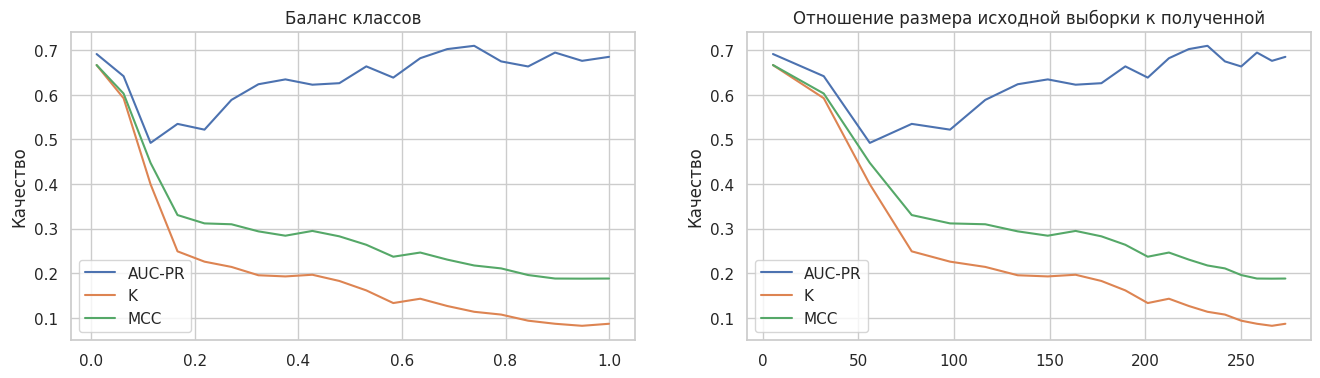

In [65]:
fig, axs = plt.subplots(figsize=(16, 4), ncols=2)
for i, ab in enumerate([rg, sizes]):
    axs[i].plot(ab, auc_pr, label='AUC-PR')
    axs[i].plot(ab, Kap, label='K')
    axs[i].plot(ab, Mcc, label='MCC')
    axs[i].legend()
    if i == 0:
        axs[i].set_title('Баланс классов')
    else:
        axs[i].set_title('Отношение размера исходной выборки к полученной')
    axs[i].set_ylabel("Качество")

Даже такой наивный подход может дать относительно неплохие результаты и улучшить наши метрики. Тем не менее, сейчас мы никак не используем информацию о распределении объектов в выборке. Оказывается, что даже относительно простые эвристические правила могут заметно поднять нам качество - например, мы можем при отбрасывании использовать близость отдельных объектов мажорного класса к минорному и отбрасывать самые близкие. Протестируем алгоритм Near-Miss на наших данных и построим графики, аналогичные предыдущему пункту (также добавьте график с зависимостью качества от числа соседей).

In [66]:
from imblearn.under_sampling import NearMiss

In [67]:
rg = np.linspace(0.01, 1, num=20)
auc_pr = []
Mcc = []
Kap = []
sizes = []
for i in rg:
    nm = NearMiss(sampling_strategy=i)
    nm_tr = nm.fit_resample(train.drop(columns=['Class']), train['Class'])
    sizes.append(train.shape[0] / nm_tr[0].shape[0])
    model = CatBoostClassifier()
    model.fit(X=nm_tr[0], y=nm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
    boost_pred = model.predict(test.drop(columns=['Class']))
    auc_pr.append(average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
    Kap.append(Kappa(test['Class'], boost_pred))
    Mcc.append(MCC(test['Class'], boost_pred))

Выходные данные были обрезаны до нескольких последних строк (5000).
29:	learn: 0.1653920	test: 0.2971010	best: 0.2971010 (29)	total: 256ms	remaining: 8.28s
30:	learn: 0.1611909	test: 0.2967646	best: 0.2967646 (30)	total: 265ms	remaining: 8.29s
31:	learn: 0.1573663	test: 0.2878426	best: 0.2878426 (31)	total: 273ms	remaining: 8.26s
32:	learn: 0.1543326	test: 0.2855413	best: 0.2855413 (32)	total: 281ms	remaining: 8.23s
33:	learn: 0.1504888	test: 0.2868404	best: 0.2855413 (32)	total: 289ms	remaining: 8.2s
34:	learn: 0.1465310	test: 0.2960889	best: 0.2855413 (32)	total: 296ms	remaining: 8.17s
35:	learn: 0.1432946	test: 0.2904978	best: 0.2855413 (32)	total: 306ms	remaining: 8.2s
36:	learn: 0.1396900	test: 0.2903221	best: 0.2855413 (32)	total: 314ms	remaining: 8.18s
37:	learn: 0.1369829	test: 0.2848700	best: 0.2848700 (37)	total: 322ms	remaining: 8.16s
38:	learn: 0.1338751	test: 0.2962724	best: 0.2848700 (37)	total: 331ms	remaining: 8.15s
39:	learn: 0.1316553	test: 0.2943459	best: 0.2848700 (

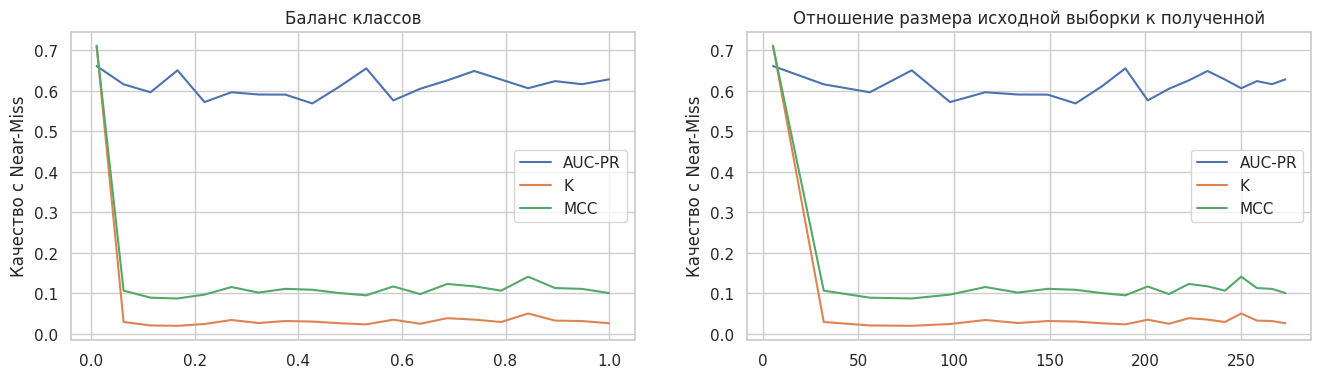

In [68]:
fig, axs = plt.subplots(figsize=(16, 4), ncols=2)
for i, ab in enumerate([rg, sizes]):
    axs[i].plot(ab, auc_pr, label='AUC-PR')
    axs[i].plot(ab, Kap, label='K')
    axs[i].plot(ab, Mcc, label='MCC')
    axs[i].legend()
    if i == 0:
        axs[i].set_title('Баланс классов')
    else:
        axs[i].set_title('Отношение размера исходной выборки к полученной')
    axs[i].set_ylabel("Качество с Near-Miss")

In [69]:
rg = range(1, 10)
auc_pr = []
Mcc = []
Kap = []
sizes = []
for i in rg:
    nm = NearMiss(n_neighbors=i)
    nm_tr = nm.fit_resample(train.drop(columns=['Class']), train['Class'])
    sizes.append(train.shape[0] / nm_tr[0].shape[0])
    model = CatBoostClassifier()
    model.fit(X=nm_tr[0], y=nm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
    boost_pred = model.predict(test.drop(columns=['Class']))
    auc_pr.append(average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
    Kap.append(Kappa(test['Class'], boost_pred))
    Mcc.append(MCC(test['Class'], boost_pred))

Выходные данные были обрезаны до нескольких последних строк (5000).
29:	learn: 0.1418642	test: 0.7533370	best: 0.6018613 (9)	total: 252ms	remaining: 8.14s
30:	learn: 0.1360651	test: 0.7672463	best: 0.6018613 (9)	total: 260ms	remaining: 8.12s
31:	learn: 0.1316328	test: 0.7905141	best: 0.6018613 (9)	total: 268ms	remaining: 8.1s
32:	learn: 0.1283855	test: 0.8042710	best: 0.6018613 (9)	total: 277ms	remaining: 8.11s
33:	learn: 0.1242306	test: 0.7956676	best: 0.6018613 (9)	total: 285ms	remaining: 8.11s
34:	learn: 0.1215409	test: 0.8069514	best: 0.6018613 (9)	total: 294ms	remaining: 8.1s
35:	learn: 0.1180177	test: 0.8176255	best: 0.6018613 (9)	total: 302ms	remaining: 8.08s
36:	learn: 0.1149422	test: 0.8132831	best: 0.6018613 (9)	total: 310ms	remaining: 8.07s
37:	learn: 0.1115332	test: 0.8296823	best: 0.6018613 (9)	total: 318ms	remaining: 8.06s
38:	learn: 0.1085795	test: 0.8503479	best: 0.6018613 (9)	total: 326ms	remaining: 8.04s
39:	learn: 0.1061858	test: 0.8625903	best: 0.6018613 (9)	total: 

Text(0, 0.5, 'Качество')

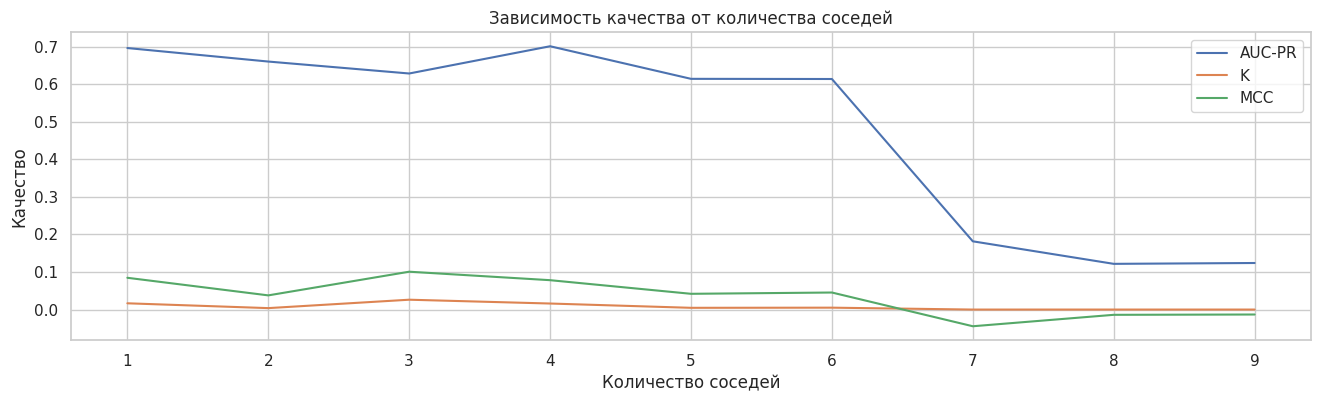

In [70]:
fig, axs = plt.subplots(figsize=(16, 4))
axs.plot(rg, auc_pr, label='AUC-PR')
axs.plot(rg, Kap, label='K')
axs.plot(rg, Mcc, label='MCC')
axs.legend()
axs.set_title("Зависимость качества от количества соседей")
axs.set_xlabel('Количество соседей')
axs.set_ylabel('Качество')

imblearn также предлагает много различных методов для андерсэмплинга. Протестируем ещё один метод.

InstanceHardnessThreshold - в этом методе для каждого объекта считается HardnessThreshold (вероятность неправильно классфицировать объект) и удаляются значения с наибольшим значением этой метрики.

In [71]:
from imblearn.under_sampling import InstanceHardnessThreshold

In [72]:
nm = InstanceHardnessThreshold(sampling_strategy=0.1, random_state=1)
nm_tr = nm.fit_resample(train.drop(columns=['Class']), train['Class'])
model = CatBoostClassifier()
model.fit(X=nm_tr[0], y=nm_tr[1], use_best_model=True, eval_set=(val.drop(columns=['Class']), val['Class']))
boost_pred = model.predict(test.drop(columns=['Class']))
print('AUC-PR для EditedNearestNeighbours  на тесте: ',average_precision_score(test['Class'], model.predict_proba(test.drop(columns=['Class']))[:, 1]))
print('Kappa для EditedNearestNeighbours  на тесте: ', Kappa(test['Class'], boost_pred))
print('MCC для EditedNearestNeighbours  на тесте: ', MCC(test['Class'], boost_pred))

Learning rate set to 0.120385
0:	learn: 0.3355180	test: 0.3330238	best: 0.3330238 (0)	total: 145ms	remaining: 2m 24s
1:	learn: 0.1586674	test: 0.1575245	best: 0.1575245 (1)	total: 281ms	remaining: 2m 20s
2:	learn: 0.0765808	test: 0.0756327	best: 0.0756327 (2)	total: 413ms	remaining: 2m 17s
3:	learn: 0.0399234	test: 0.0398013	best: 0.0398013 (3)	total: 552ms	remaining: 2m 17s
4:	learn: 0.0227451	test: 0.0232074	best: 0.0232074 (4)	total: 691ms	remaining: 2m 17s
5:	learn: 0.0137826	test: 0.0142058	best: 0.0142058 (5)	total: 821ms	remaining: 2m 15s
6:	learn: 0.0090905	test: 0.0096016	best: 0.0096016 (6)	total: 960ms	remaining: 2m 16s
7:	learn: 0.0065472	test: 0.0070988	best: 0.0070988 (7)	total: 1.09s	remaining: 2m 15s
8:	learn: 0.0050064	test: 0.0055987	best: 0.0055987 (8)	total: 1.24s	remaining: 2m 16s
9:	learn: 0.0040796	test: 0.0046876	best: 0.0046876 (9)	total: 1.36s	remaining: 2m 15s
10:	learn: 0.0035094	test: 0.0041477	best: 0.0041477 (10)	total: 1.49s	remaining: 2m 14s
11:	learn: 

Как мы могли заметить, методы балансировки выборок очень часто могут привести к не самым лучшим результатам из-за того, что они по сути искажают информацию о реальном распределении данных.

Теперь давайте попробуем слегка сменить постановку задачи и переключиться на задачу "одноклассовой" классификации, то есть - поиска *аномалий* в выборке. В общем-то, это вполне согласуется с нашей областью работы - мы действительно можем назвать мошеннические транзакции аномальньми (как интуитивно, так и на основании наблюдаемой балансировки данных).

Стоит отметить, что методы обнаружения аномалий чаще всего относятся к классу методов обучения без учителя.

Протестируем два метода [One-Class SVM](https://www.geeksforgeeks.org/understanding-one-class-support-vector-machines/) и [Local Outlier Factor](https://en.wikipedia.org/wiki/Local_outlier_factor) (подробного описания оставлять не буду, проще и интереснее самому прочитать).

Для One-Class SVM возьмём подвыборку из 50к примеров и стандартизируем её.

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

credit_data = pd.read_csv('/content/sample_data/creditcard.csv', nrows=50000)
standardized_data_without_class = StandardScaler().fit_transform(credit_data.loc[:,credit_data.columns!='Class'])
data_50k_new = standardized_data_without_class[0:50000]
data_50k_df = pd.DataFrame(data=data_50k_new)

X = credit_data.drop(columns=['Class'])
y = credit_data['Class']

clf_svm = OneClassSVM(kernel="rbf", degree=3, gamma=0.1, nu=0.01)
y_predict = clf_svm.fit_predict(data_50k_df)
svm_predict = pd.Series(y_predict).replace([-1,1],[1,0])
svm_anomalies = data_50k_df[svm_predict==1]

accuracy = accuracy_score(y, svm_predict)
print("Accuracy in separating Outlier:", accuracy)
print('AUC-PR для clf : ', average_precision_score(y, clf_svm.score_samples(data_50k_df)))
print('Kappa для clf : ', Kappa(y, svm_predict))
print('MCC для clf : ', MCC(y, svm_predict))

Accuracy in separating Outlier: 0.9641
AUC-PR для clf :  0.0015354584943721794
Kappa для clf :  0.05455401369262609
MCC для clf :  0.10342927262807038


In [87]:
from sklearn.neighbors import LocalOutlierFactor


scaler = StandardScaler()
scaled_train = scaler.fit_transform(train.drop(columns=['Class']))
scaled_test = scaler.transform(test.drop(columns=['Class']))
lof = LocalOutlierFactor(n_neighbors=20, novelty=True).fit(scaled_train)
lof_pred = lof.predict(scaled_test)
lof_predict =  pd.Series(lof_pred).replace([-1,1],[1,0])
print('AUC-PR для LOF : ', average_precision_score(test['Class'], lof.score_samples(scaled_test)))
print('Kappa для LOF : ', Kappa(test['Class'].values, lof_predict))
print('MCC для LOF : ', MCC(test['Class'].values, lof_predict))

AUC-PR для LOF :  0.0018984867752781511
Kappa для LOF :  -0.00023764002985497137
MCC для LOF :  -0.0037137926099384353


Видим, что метрики так себе, вероятно можно поиграться с гиперпараметрами или попробовать покомбинировать разлиные методы.

Есть ещё популярный подход для детекции аномалий Isolation Forest. В нём мы считаем объекты аномальными, если они очень быстро попали в лист дерева.